In [123]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)



In [124]:
# load the Health Insurance dataset 

Fraud_Detection= pd.read_csv(r"PS_20174392719_1491204439457_log.csv", header=0)

# Copy to back-up file

Fraud_Detection_BK =  Fraud_Detection.copy()

# Display the first 5 records

Fraud_Detection.head(8)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.0,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.0,0,0


In [125]:
Fraud_Detection.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [126]:
Fraud_Detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [127]:
Fraud_Detection.shape

(6362620, 11)

In [128]:
Fraud_Detection_dup = Fraud_Detection[Fraud_Detection.duplicated(keep='last')]
# Display the duplicate recor
Fraud_Detection_dup

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [129]:
Fraud_Detection.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [130]:
Fraud_Detection.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

isFraud
0    6354407
1       8213
Name: count, dtype: int64


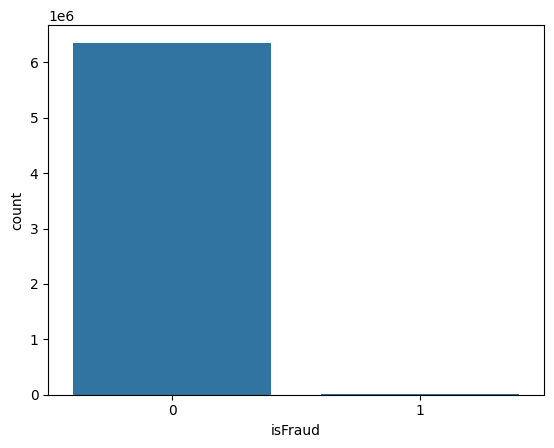

In [131]:
a=Fraud_Detection['isFraud'].value_counts()
ax=sns.countplot(x='isFraud',data=Fraud_Detection)
print(a)

In [132]:
100 * (8213/float(Fraud_Detection.shape[0]))

0.12908204481801522

In [133]:
100 * (6354407/float(Fraud_Detection.shape[0]))

99.87091795518198

In [134]:
Fraud_Detection['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [135]:
Fraud_Detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


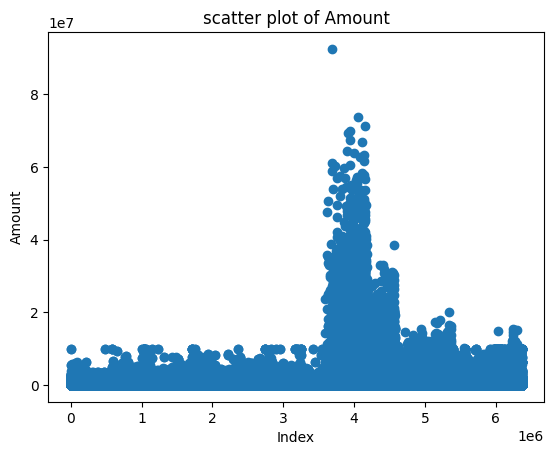

In [136]:
#Scatter plot for outliers 
plt.scatter(Fraud_Detection.index,Fraud_Detection['amount'])
plt.xlabel('Index')
plt.ylabel('Amount')
plt.title('scatter plot of Amount')
plt.show()

# UNDER SAMPLING

In [138]:
min_len=len(Fraud_Detection[Fraud_Detection['isFraud']==1])
print(min_len)

8213


In [139]:
maj_idx=Fraud_Detection[Fraud_Detection['isFraud']==0].index
print(maj_idx)

Index([      0,       1,       4,       5,       6,       7,       8,       9,
            10,      11,
       ...
       6362314, 6362315, 6362316, 6362317, 6362318, 6362319, 6362320, 6362321,
       6362322, 6362323],
      dtype='int64', length=6354407)


In [140]:
random_maj_idx=np.random.choice(maj_idx,min_len,replace=False)
print(len(random_maj_idx))

8213


In [141]:
min_idx=Fraud_Detection[Fraud_Detection['isFraud']==1].index
print(min_idx)

Index([      2,       3,     251,     252,     680,     681,     724,     969,
           970,    1115,
       ...
       6362610, 6362611, 6362612, 6362613, 6362614, 6362615, 6362616, 6362617,
       6362618, 6362619],
      dtype='int64', length=8213)


In [142]:
under_sampling_idx=np.concatenate([min_idx,random_maj_idx])

In [143]:
under_sample=Fraud_Detection.loc[under_sampling_idx]

<Axes: xlabel='isFraud', ylabel='count'>

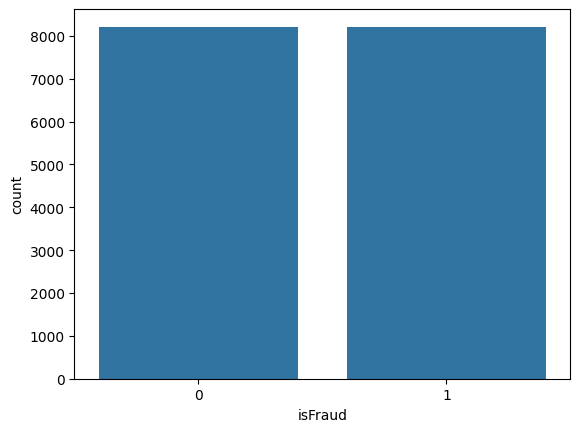

In [144]:
sns.countplot(x='isFraud',data=under_sample)

In [145]:
isFraud_UL=round(under_sample.isFraud.mean()+3*under_sample.isFraud.std(),3)
isFraud_LL=round(under_sample.isFraud.mean()-3*under_sample.isFraud.std(),3)
under_sample_new=under_sample[(under_sample.isFraud>isFraud_LL)&(under_sample.isFraud<isFraud_UL)]
under_sample_BK2=under_sample.copy()
under_sample_new.shape

(16426, 11)

In [146]:
#count the target or dependent variable by 0,1 and their proportion
#(>=10:1,then the dataset is imbalance data)
isFraud_count=under_sample_new.isFraud.value_counts()
print("Class 0:",isFraud_count[0])
print("Class 1:",isFraud_count[1])
print("Proportion:",round(isFraud_count[0]/isFraud_count[1],2),':1')
print('Total Fraud Detection Records:',len(under_sample_new))

Class 0: 8213
Class 1: 8213
Proportion: 1.0 :1
Total Fraud Detection Records: 16426


In [147]:
under_sample_new.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [148]:
under_sample_new=under_sample_new.drop(['nameOrig','newbalanceOrig',
       'nameDest','newbalanceDest','isFlaggedFraud'],axis=1)

In [149]:
under_sample_new.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud'], dtype='object')

In [150]:
under_sample_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 2 to 2065522
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   oldbalanceOrg   16426 non-null  float64
 4   oldbalanceDest  16426 non-null  float64
 5   isFraud         16426 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 898.3+ KB


In [151]:
under_sample_new['type'].value_counts()

type
CASH_OUT    6912
TRANSFER    4774
PAYMENT     2819
CASH_IN     1859
DEBIT         62
Name: count, dtype: int64

In [152]:
under_sample_new['type']=under_sample_new['type'].map({'CASH_OUT':0,'PAYMENT':1,'CASH_IN':2,'TRANSFER':3,'DEBIT':4})
under_sample_new

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud
2,1,3,181.00,181.00,0.00,1
3,1,0,181.00,181.00,21182.00,1
251,1,3,2806.00,2806.00,0.00,1
252,1,0,2806.00,2806.00,26202.00,1
680,1,3,20128.00,20128.00,0.00,1
...,...,...,...,...,...,...
4327530,308,0,119793.39,51651.00,0.00,0
1080512,129,2,108985.59,4533097.88,187092.39,0
2793772,216,1,9444.19,41491.00,0.00,0
925645,43,0,181525.69,2092.00,2927.47,0


Text(0.5, 1.0, 'Correlation On\xa0Fraud\xa0Classes')

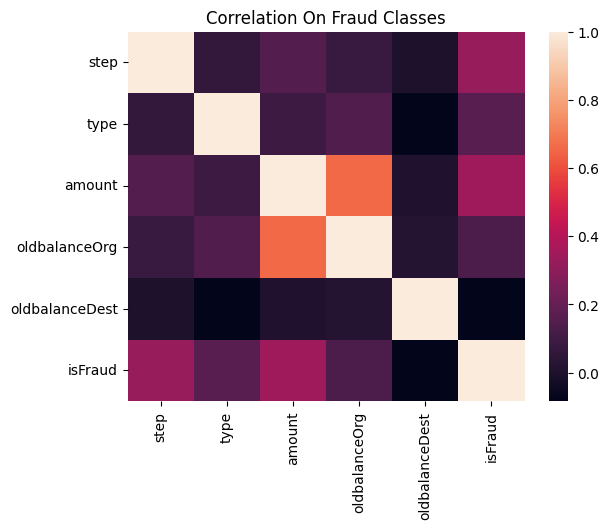

In [153]:
plt.figure(1)
sns.heatmap(under_sample_new.corr())
plt.title('Correlation On Fraud Classes')

In [154]:
under_sample_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16426 entries, 2 to 2065522
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  int64  
 2   amount          16426 non-null  float64
 3   oldbalanceOrg   16426 non-null  float64
 4   oldbalanceDest  16426 non-null  float64
 5   isFraud         16426 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 898.3 KB


In [155]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in under_sample_new.columns:
    if col != 'isFraud':
        IndepVar.append(col)

TargetVar = 'isFraud'

x = under_sample_new[IndepVar]
y = under_sample_new[TargetVar]

In [156]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((11498, 5), (4928, 5), (11498,), (4928,))

In [157]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# KNN CLASSIFIER

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[1963  516]
 [ 177 2272]]
Outcome values : 
 1963 516 177 2272
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.79      0.85      2479
           0       0.81      0.93      0.87      2449

    accuracy                           0.86      4928
   macro avg       0.87      0.86      0.86      4928
weighted avg       0.87      0.86      0.86      4928

Accuracy : 85.9 %
Precision : 91.7 %
Recall : 79.2 %
F1 Score : 0.85
Specificity or True Negative Rate : 92.8 %
Balanced Accuracy : 86.0 %
MCC : 0.726
roc_auc_score: 0.86


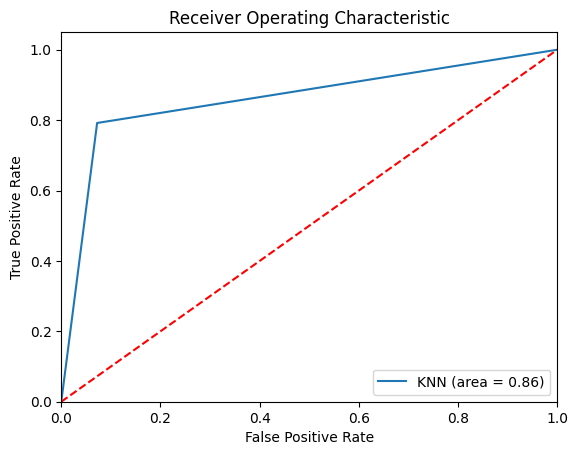

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[1841  638]
 [  95 2354]]
Outcome values : 
 1841 638 95 2354
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.74      0.83      2479
           0       0.79      0.96      0.87      2449

    accuracy                           0.85      4928
   macro avg       0.87      0.85      0.85      4928
weighted avg       0.87      0.85      0.85      4928

Accuracy : 85.1 %
Precision : 95.1 %
Recall : 74.3 %
F1 Score : 0.834
Specificity or True Negative Rate : 96.1 %
Balanced Accuracy : 85.2 %
MCC : 0.721
roc_auc_score: 0.852


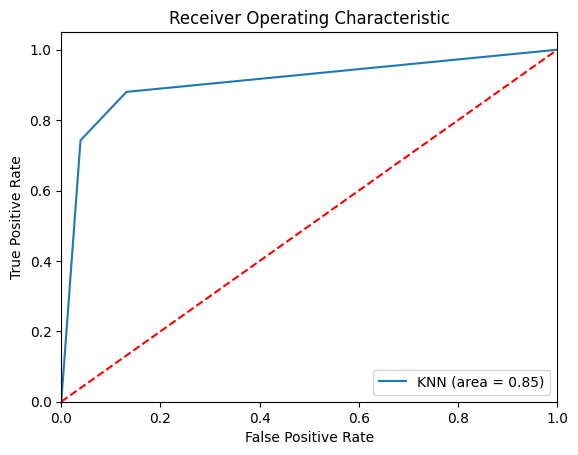

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[2085  394]
 [ 176 2273]]
Outcome values : 
 2085 394 176 2273
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.84      0.88      2479
           0       0.85      0.93      0.89      2449

    accuracy                           0.88      4928
   macro avg       0.89      0.88      0.88      4928
weighted avg       0.89      0.88      0.88      4928

Accuracy : 88.4 %
Precision : 92.2 %
Recall : 84.1 %
F1 Score : 0.88
Specificity or True Negative Rate : 92.8 %
Balanced Accuracy : 88.5 %
MCC : 0.772
roc_auc_score: 0.885


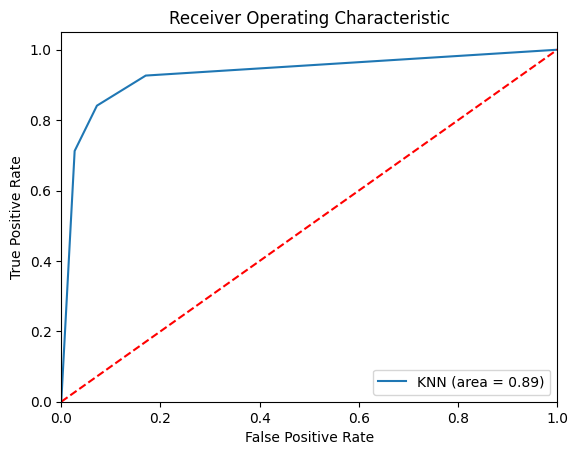

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[2011  468]
 [ 129 2320]]
Outcome values : 
 2011 468 129 2320
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.81      0.87      2479
           0       0.83      0.95      0.89      2449

    accuracy                           0.88      4928
   macro avg       0.89      0.88      0.88      4928
weighted avg       0.89      0.88      0.88      4928

Accuracy : 87.9 %
Precision : 94.0 %
Recall : 81.1 %
F1 Score : 0.871
Specificity or True Negative Rate : 94.7 %
Balanced Accuracy : 87.9 %
MCC : 0.765
roc_auc_score: 0.879


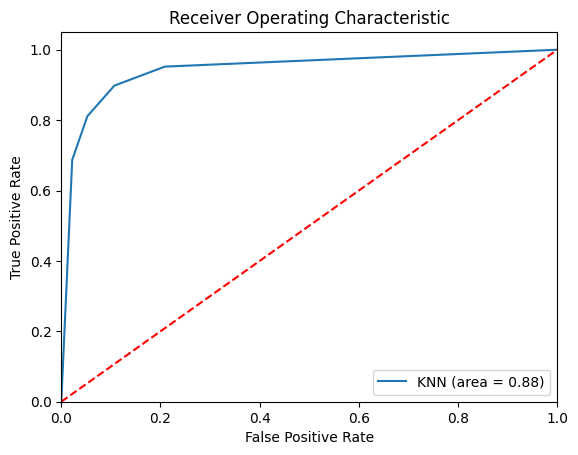

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[2164  315]
 [ 194 2255]]
Outcome values : 
 2164 315 194 2255
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.87      0.89      2479
           0       0.88      0.92      0.90      2449

    accuracy                           0.90      4928
   macro avg       0.90      0.90      0.90      4928
weighted avg       0.90      0.90      0.90      4928

Accuracy : 89.7 %
Precision : 91.8 %
Recall : 87.3 %
F1 Score : 0.895
Specificity or True Negative Rate : 92.1 %
Balanced Accuracy : 89.7 %
MCC : 0.794
roc_auc_score: 0.897


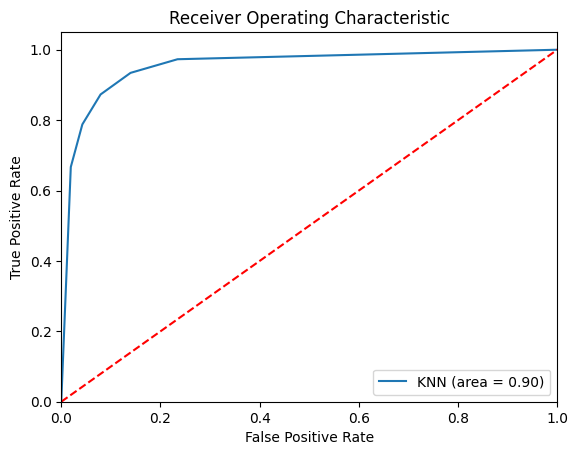

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[2113  366]
 [ 143 2306]]
Outcome values : 
 2113 366 143 2306
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.85      0.89      2479
           0       0.86      0.94      0.90      2449

    accuracy                           0.90      4928
   macro avg       0.90      0.90      0.90      4928
weighted avg       0.90      0.90      0.90      4928

Accuracy : 89.7 %
Precision : 93.7 %
Recall : 85.2 %
F1 Score : 0.893
Specificity or True Negative Rate : 94.2 %
Balanced Accuracy : 89.7 %
MCC : 0.797
roc_auc_score: 0.897


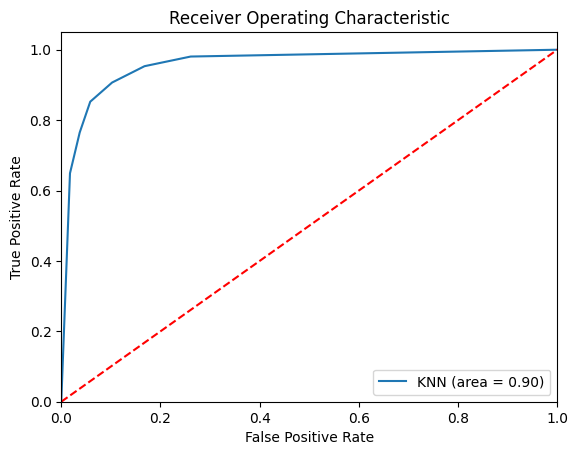

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[2208  271]
 [ 188 2261]]
Outcome values : 
 2208 271 188 2261
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.89      0.91      2479
           0       0.89      0.92      0.91      2449

    accuracy                           0.91      4928
   macro avg       0.91      0.91      0.91      4928
weighted avg       0.91      0.91      0.91      4928

Accuracy : 90.7 %
Precision : 92.2 %
Recall : 89.1 %
F1 Score : 0.906
Specificity or True Negative Rate : 92.3 %
Balanced Accuracy : 90.7 %
MCC : 0.814
roc_auc_score: 0.907


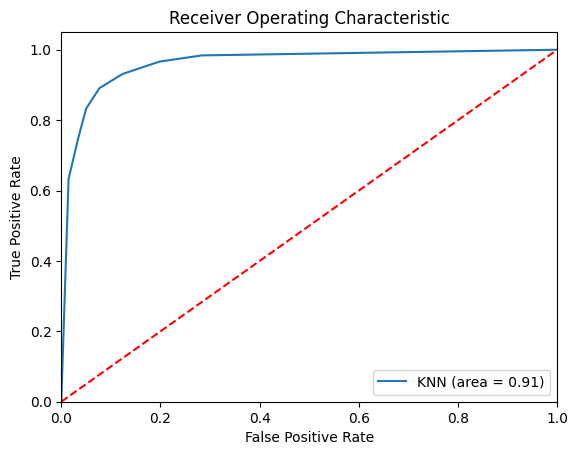

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[2172  307]
 [ 155 2294]]
Outcome values : 
 2172 307 155 2294
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.88      0.90      2479
           0       0.88      0.94      0.91      2449

    accuracy                           0.91      4928
   macro avg       0.91      0.91      0.91      4928
weighted avg       0.91      0.91      0.91      4928

Accuracy : 90.6 %
Precision : 93.3 %
Recall : 87.6 %
F1 Score : 0.904
Specificity or True Negative Rate : 93.7 %
Balanced Accuracy : 90.7 %
MCC : 0.814
roc_auc_score: 0.906


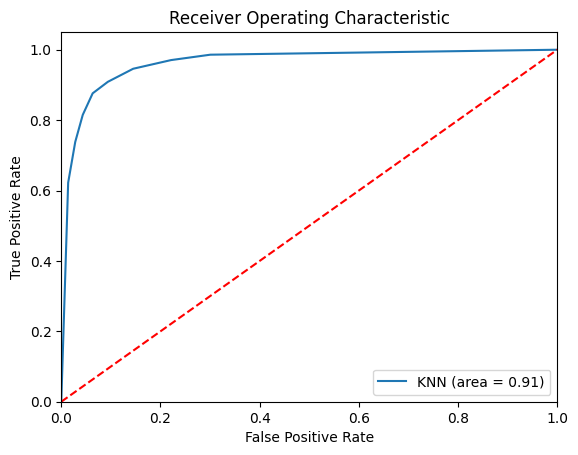

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[2227  252]
 [ 198 2251]]
Outcome values : 
 2227 252 198 2251
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.90      0.91      2479
           0       0.90      0.92      0.91      2449

    accuracy                           0.91      4928
   macro avg       0.91      0.91      0.91      4928
weighted avg       0.91      0.91      0.91      4928

Accuracy : 90.9 %
Precision : 91.8 %
Recall : 89.8 %
F1 Score : 0.908
Specificity or True Negative Rate : 91.9 %
Balanced Accuracy : 90.9 %
MCC : 0.818
roc_auc_score: 0.909


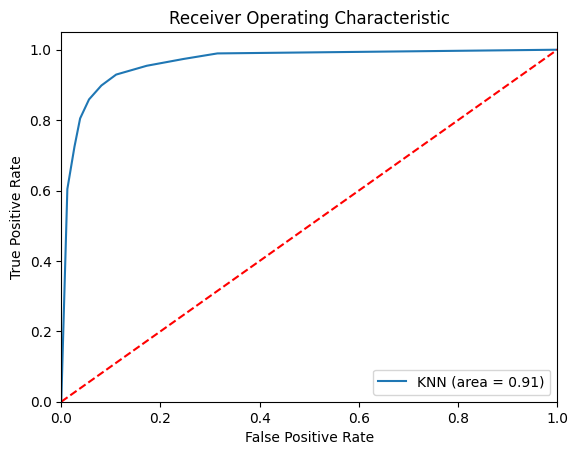

                            Model Name KNN K Value True_Positive  \
0  KNeighborsClassifier(n_neighbors=1)           1          1963   
1  KNeighborsClassifier(n_neighbors=2)           2          1841   
2  KNeighborsClassifier(n_neighbors=3)           3          2085   
3  KNeighborsClassifier(n_neighbors=4)           4          2011   
4               KNeighborsClassifier()           5          2164   
5  KNeighborsClassifier(n_neighbors=6)           6          2113   
6  KNeighborsClassifier(n_neighbors=7)           7          2208   
7  KNeighborsClassifier(n_neighbors=8)           8          2172   
8  KNeighborsClassifier(n_neighbors=9)           9          2227   

  False_Negative False_Positive True_Negative  Accuracy  Precision  Recall  \
0            516            177          2272     0.859      0.917   0.792   
1            638             95          2354     0.851      0.951   0.743   
2            394            176          2273     0.884      0.922   0.841   
3      

In [159]:
# Initialize an empty DataFrame to store results
import pandas as pd  # Ensure pandas is imported

KNN_Results = pd.DataFrame(columns=[
    'Model Name', 'KNN K Value', 'True_Positive', 'False_Negative',
    'False_Positive', 'True_Negative', 'Accuracy', 'Precision',
    'Recall', 'F1 Score', 'Specificity', 'MCC',
    'ROC_AUC_Score', 'Balanced Accuracy'
])

accuracy = []

for a in range(1, 10, 1):
    k = a
    
    # Build the model
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    print('Model Name: ', ModelKNN)
    
    # Confusion matrix
    matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
    print('Confusion matrix : \n', matrix)
    
    # Outcome values
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=[1, 0]).ravel()
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # Classification report
    C_Report = classification_report(y_test, y_pred, labels=[1, 0])
    print('Classification report : \n', C_Report)
    
    # Calculating metrics
    sensitivity = round(tp / (tp + fn), 3)
    specificity = round(tn / (tn + fp), 3)
    accuracy_value = round((tp + tn) / (tp + fp + tn + fn), 3)
    balanced_accuracy = round((sensitivity + specificity) / 2, 3)
    precision = round(tp / (tp + fp), 3)
    f1Score = round((2 * tp) / (2 * tp + fp + fn), 3)
    
    # Matthews Correlation Coefficient (MCC)
    mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3) if mx != 0 else 0
    
    print('Accuracy :', round(accuracy_value * 100, 2), '%')
    print('Precision :', round(precision * 100, 2), '%')
    print('Recall :', round(sensitivity * 100, 2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity * 100, 2), '%')
    print('Balanced Accuracy :', round(balanced_accuracy * 100, 2), '%')
    print('MCC :', MCC)
    
    # Area under ROC curve
    roc_auc = round(roc_auc_score(y_test, y_pred), 3)
    print('roc_auc_score:', roc_auc)
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # Add results to DataFrame
    new_row = {
        'Model Name': ModelKNN,
        'KNN K Value': a,
        'True_Positive': tp,
        'False_Negative': fn,
        'False_Positive': fp,
        'True_Negative': tn,
        'Accuracy': accuracy_value,
        'Precision': precision,
        'Recall': sensitivity,
        'F1 Score': f1Score,
        'Specificity': specificity,
        'MCC': MCC,
        'ROC_AUC_Score': roc_auc,
        'Balanced Accuracy': balanced_accuracy
    }
    KNN_Results = KNN_Results._append(new_row, ignore_index=True)

# Display the final results DataFrame
print(KNN_Results)


In [160]:
KNN_Results.head(10)

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,1963,516,177,2272,0.859,0.917,0.792,0.850,0.928,0.726,0.860,0.860
1,KNeighborsClassifier(n_neighbors=2),2,1841,638,95,2354,0.851,0.951,0.743,0.834,0.961,0.721,0.852,0.852
2,KNeighborsClassifier(n_neighbors=3),3,2085,394,176,2273,0.884,0.922,0.841,0.880,0.928,0.772,0.885,0.885
3,KNeighborsClassifier(n_neighbors=4),4,2011,468,129,2320,0.879,0.940,0.811,0.871,0.947,0.765,0.879,0.879
4,KNeighborsClassifier(),5,2164,315,194,2255,0.897,0.918,0.873,0.895,0.921,0.794,0.897,0.897
5,KNeighborsClassifier(n_neighbors=6),6,2113,366,143,2306,0.897,0.937,0.852,0.893,0.942,0.797,0.897,0.897
6,KNeighborsClassifier(n_neighbors=7),7,2208,271,188,2261,0.907,0.922,0.891,0.906,0.923,0.814,0.907,0.907
7,KNeighborsClassifier(n_neighbors=8),8,2172,307,155,2294,0.906,0.933,0.876,0.904,0.937,0.814,0.906,0.907
8,KNeighborsClassifier(n_neighbors=9),9,2227,252,198,2251,0.909,0.918,0.898,0.908,0.919,0.818,0.909,0.909


Model Name: LinearRegression()
Confusion matrix : 
 [[1866  613]
 [ 448 2001]]
Outcome values : 
 1866 613 448 2001
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.75      0.78      2479
           0       0.77      0.82      0.79      2449

    accuracy                           0.78      4928
   macro avg       0.79      0.78      0.78      4928
weighted avg       0.79      0.78      0.78      4928

Accuracy : 78.5 %
Precision : 80.6 %
Recall : 75.3 %
F1 Score : 0.779
Specificity or True Negative Rate : 81.7 %
Balanced Accuracy : 78.5 %
MCC : 0.571
roc_auc_score: 0.837


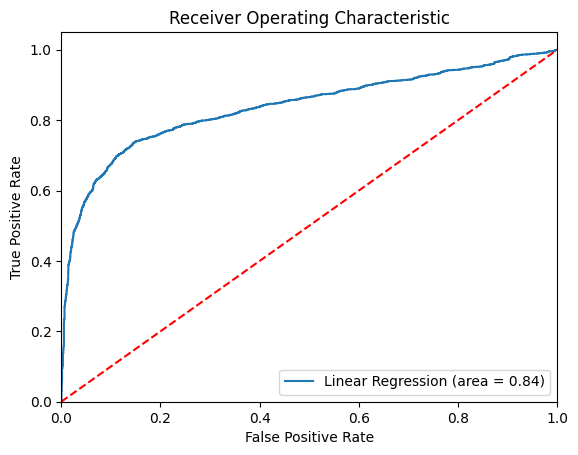

           Model Name True_Positive False_Negative False_Positive  \
0  LinearRegression()          1866            613            448   

  True_Negative  Accuracy  Precision  Recall  F1 Score  Specificity    MCC  \
0          2001     0.785      0.806   0.753     0.779        0.817  0.571   

   ROC_AUC_Score  Balanced Accuracy  
0          0.837              0.785  


In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

# Initialize an empty DataFrame to store results
LR_Results = pd.DataFrame(columns=[
    'Model Name', 'True_Positive', 'False_Negative', 
    'False_Positive', 'True_Negative', 'Accuracy', 
    'Precision', 'Recall', 'F1 Score', 'Specificity', 
    'MCC', 'ROC_AUC_Score', 'Balanced Accuracy'
])

# Build the model
ModelLR = LinearRegression()

# Train the model
ModelLR.fit(x_train, y_train)

# Predict probabilities
y_pred_prob = ModelLR.predict(x_test)

# Apply a threshold to determine predicted classes
threshold = 0.5
y_pred = (y_pred_prob >= threshold).astype(int)

# Print the model name
print('Model Name:', ModelLR)

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
print('Confusion matrix : \n', matrix)

# Outcome values
tp, fn, fp, tn = matrix.ravel()
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report
C_Report = classification_report(y_test, y_pred, labels=[1, 0])
print('Classification report : \n', C_Report)

# Metrics
sensitivity = round(tp / (tp + fn), 3) if (tp + fn) > 0 else 0
specificity = round(tn / (tn + fp), 3) if (tn + fp) > 0 else 0
accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
balanced_accuracy = round((sensitivity + specificity) / 2, 3)
precision = round(tp / (tp + fp), 3) if (tp + fp) > 0 else 0
f1Score = round((2 * tp) / (2 * tp + fp + fn), 3) if (2 * tp + fp + fn) > 0 else 0

# Matthews Correlation Coefficient (MCC)
mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3) if mx != 0 else 0

# Print metrics
print('Accuracy :', round(accuracy * 100, 2), '%')
print('Precision :', round(precision * 100, 2), '%')
print('Recall :', round(sensitivity * 100, 2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity * 100, 2), '%')
print('Balanced Accuracy :', round(balanced_accuracy * 100, 2), '%')
print('MCC :', MCC)

# Area under ROC curve
roc_auc = round(roc_auc_score(y_test, y_pred_prob), 3)
print('roc_auc_score:', roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Linear Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Add results to DataFrame
new_row = {
    'Model Name': ModelLR,
    'True_Positive': tp,
    'False_Negative': fn,
    'False_Positive': fp,
    'True_Negative': tn,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': sensitivity,
    'F1 Score': f1Score,
    'Specificity': specificity,
    'MCC': MCC,
    'ROC_AUC_Score': roc_auc,
    'Balanced Accuracy': balanced_accuracy
}
LR_Results = LR_Results._append(new_row, ignore_index=True)

# Display the final results DataFrame
print(LR_Results)


Model Name: Linear Probability Model
Confusion matrix : 
 [[1866  613]
 [ 448 2001]]
Outcome values : 
 1866 613 448 2001
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.75      0.78      2479
           0       0.77      0.82      0.79      2449

    accuracy                           0.78      4928
   macro avg       0.79      0.78      0.78      4928
weighted avg       0.79      0.78      0.78      4928

Accuracy : 78.5 %
Precision : 80.6 %
Recall : 75.3 %
F1 Score : 0.779
Specificity or True Negative Rate : 81.7 %
Balanced Accuracy : 78.5 %
MCC : 0.571
roc_auc_score: 0.837


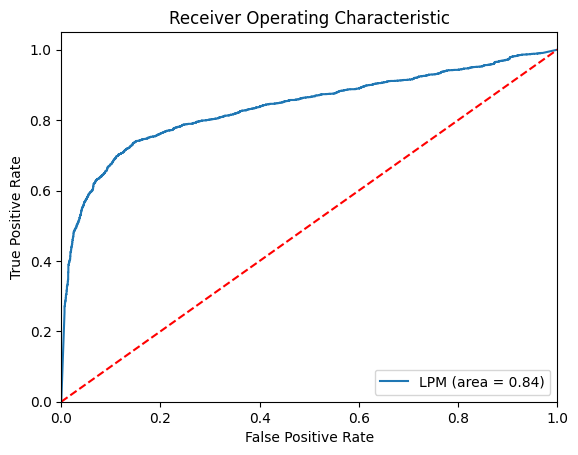

                 Model Name True_Positive False_Negative False_Positive  \
0  Linear Probability Model          1866            613            448   

  True_Negative  Accuracy  Precision  Recall  F1 Score  Specificity    MCC  \
0          2001     0.785      0.806   0.753     0.779        0.817  0.571   

   ROC_AUC_Score  Balanced Accuracy  
0          0.837              0.785  


In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

# Initialize an empty DataFrame to store results
LPM_Results = pd.DataFrame(columns=[
    'Model Name', 'True_Positive', 'False_Negative', 
    'False_Positive', 'True_Negative', 'Accuracy', 
    'Precision', 'Recall', 'F1 Score', 'Specificity', 
    'MCC', 'ROC_AUC_Score', 'Balanced Accuracy'
])

# Build the Linear Probability Model (LPM)
ModelLPM = LinearRegression()

# Train the model
ModelLPM.fit(x_train, y_train)

# Predict probabilities
y_pred_prob = ModelLPM.predict(x_test)

# Ensure probabilities are in the range [0, 1] (clip them)
y_pred_prob_clipped = y_pred_prob.clip(0, 1)

# Apply a threshold to determine predicted classes
threshold = 0.5
y_pred = (y_pred_prob_clipped >= threshold).astype(int)

# Print the model name
print('Model Name: Linear Probability Model')

# Confusion matrix
matrix = confusion_matrix(y_test, y_pred, labels=[1, 0])
print('Confusion matrix : \n', matrix)

# Outcome values
tp, fn, fp, tn = matrix.ravel()
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report
C_Report = classification_report(y_test, y_pred, labels=[1, 0])
print('Classification report : \n', C_Report)

# Metrics
sensitivity = round(tp / (tp + fn), 3) if (tp + fn) > 0 else 0
specificity = round(tn / (tn + fp), 3) if (tn + fp) > 0 else 0
accuracy = round((tp + tn) / (tp + fp + tn + fn), 3)
balanced_accuracy = round((sensitivity + specificity) / 2, 3)
precision = round(tp / (tp + fp), 3) if (tp + fp) > 0 else 0
f1Score = round((2 * tp) / (2 * tp + fp + fn), 3) if (2 * tp + fp + fn) > 0 else 0

# Matthews Correlation Coefficient (MCC)
mx = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3) if mx != 0 else 0

# Print metrics
print('Accuracy :', round(accuracy * 100, 2), '%')
print('Precision :', round(precision * 100, 2), '%')
print('Recall :', round(sensitivity * 100, 2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity * 100, 2), '%')
print('Balanced Accuracy :', round(balanced_accuracy * 100, 2), '%')
print('MCC :', MCC)

# Area under ROC curve
roc_auc = round(roc_auc_score(y_test, y_pred_prob_clipped), 3)
print('roc_auc_score:', roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_clipped)
plt.figure()
plt.plot(fpr, tpr, label='LPM (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Add results to DataFrame
new_row = {
    'Model Name': 'Linear Probability Model',
    'True_Positive': tp,
    'False_Negative': fn,
    'False_Positive': fp,
    'True_Negative': tn,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': sensitivity,
    'F1 Score': f1Score,
    'Specificity': specificity,
    'MCC': MCC,
    'ROC_AUC_Score': roc_auc,
    'Balanced Accuracy': balanced_accuracy
}
LPM_Results = LPM_Results._append(new_row, ignore_index=True)

# Display the final results DataFrame
print(LPM_Results)


# DECISION TREE CLASSIFIER

In [164]:
#to build 'Decission Tree' model with random sampling
from sklearn.tree import DecisionTreeClassifier
#create an object
ModelDT=DecisionTreeClassifier()
#train the model
ModelDT.fit(x_train, y_train)

# Predict the model with test data

y_pred1 = ModelDT.predict(x_test)
y_pred_prob = ModelDT.predict_proba(x_test)

Confusion matrix : 
 [[1754  725]
 [  33 2416]]
Outcome values : 
 1754 725 33 2416
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.71      0.82      2479
           0       0.77      0.99      0.86      2449

    accuracy                           0.85      4928
   macro avg       0.88      0.85      0.84      4928
weighted avg       0.88      0.85      0.84      4928

Accuracy : 84.6 %
Precision : 98.2 %
Recall : 70.8 %
F1 Score : 0.822
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 84.7 %
MCC : 0.722
roc_auc_score: 0.847


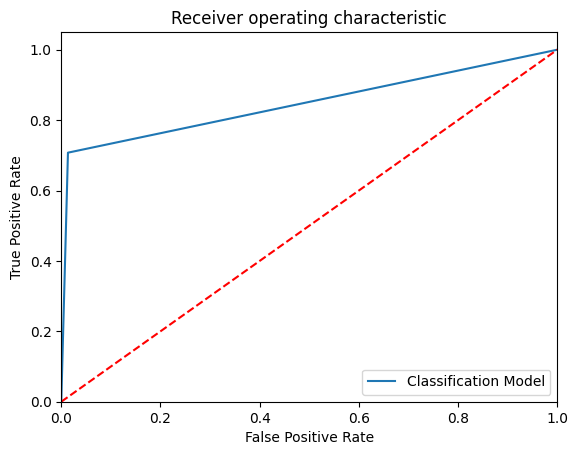

-----------------------------------------------------------------------------------------------------


In [165]:
# 'Confusion matrix' and 'classification report' in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred1

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelDT.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

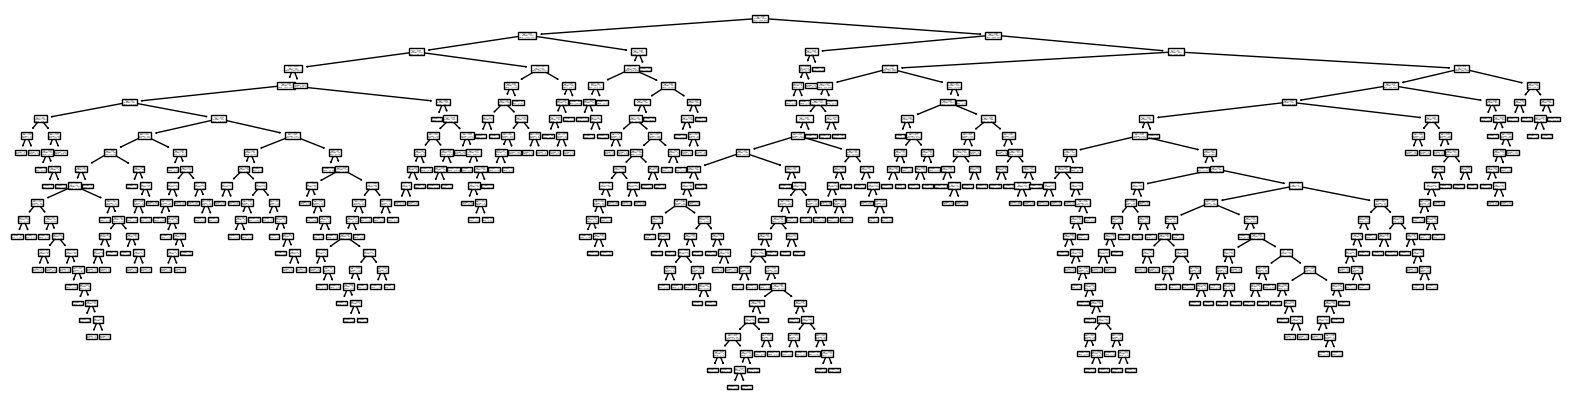

In [166]:
#plot the decission tree
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20,5))
tree.plot_tree(ModelDT);

# RANDOM FOREST CLASSIFIER

In [168]:
#to build 'Random Forest' model with random sampling
from sklearn.ensemble import RandomForestClassifier
#create an object
ModelRFR=RandomForestClassifier()
#train the model
ModelRFR.fit(x_train, y_train)

# Predict the model with test data

y_pred2 = ModelRFR.predict(x_test)
y_pred_prob = ModelRFR.predict_proba(x_test)



Confusion matrix : 
 [[1923  556]
 [  33 2416]]
Outcome values : 
 1923 556 33 2416
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.78      0.87      2479
           0       0.81      0.99      0.89      2449

    accuracy                           0.88      4928
   macro avg       0.90      0.88      0.88      4928
weighted avg       0.90      0.88      0.88      4928

Accuracy : 88.0 %
Precision : 98.3 %
Recall : 77.6 %
F1 Score : 0.867
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 88.2 %
MCC : 0.779
roc_auc_score: 0.881


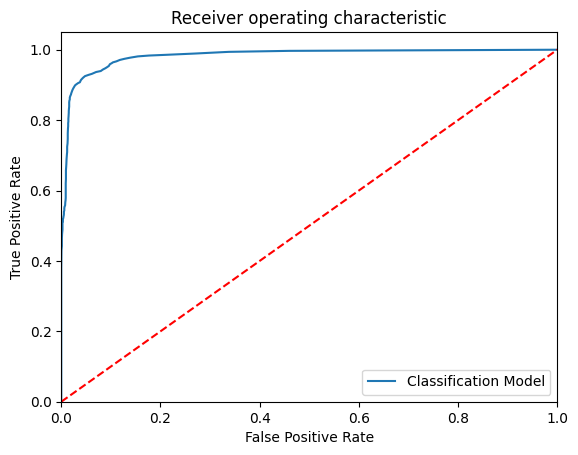

-----------------------------------------------------------------------------------------------------


In [169]:
# 'Confusion matrix' and 'classification report' in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred2

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRFR.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

# Proceeding with Random Forest Classifier

<Axes: xlabel='type', ylabel='count'>

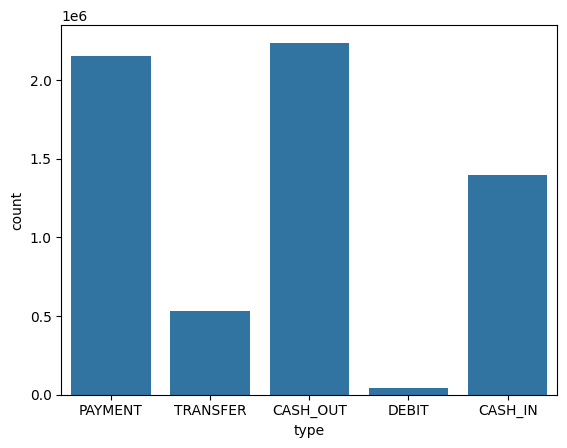

In [171]:
sns.countplot(x=Fraud_Detection_BK['type'])

<Axes: xlabel='step', ylabel='count'>

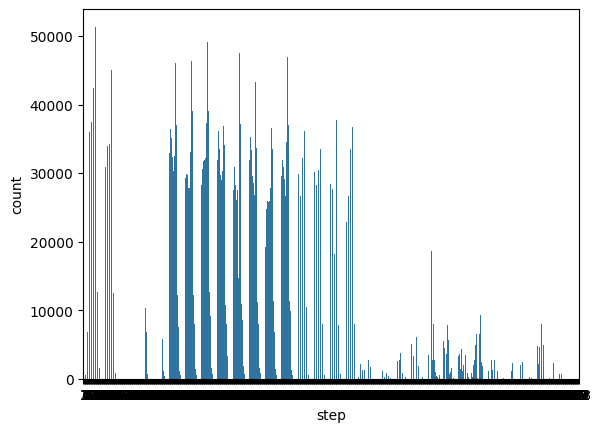

In [172]:
sns.countplot(x=Fraud_Detection_BK['step'])

In [173]:
Results = pd.DataFrame({ 'isFraud_P':y_pred2})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = under_sample_BK2.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isFraud_P
3162,2,TRANSFER,963532.14,C1440057381,963532.14,0.00,C268086000,0.00,0.00,1,0,0
2301,1,TRANSFER,235238.66,C1872047468,235238.66,0.00,C116289363,0.00,0.00,1,0,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.00,C339924917,6268.00,12145.85,1,0,1
4212,3,PAYMENT,14294.08,C569894199,69899.00,55604.92,M854202039,0.00,0.00,0,0,0
3272,2,CASH_OUT,14949.84,C395257482,14949.84,0.00,C1032986144,18161.79,33111.63,1,0,0


         Fold  Accuracy  Precision    Recall  F1 Score  Specificity   ROC AUC  \
K Value                                                                         
1.0       3.0  0.932597   0.931623  0.933340  0.932468     0.931798  0.932569   
2.0       3.0  0.927031   0.961518  0.889212  0.923946     0.964604  0.959524   
3.0       3.0  0.933640   0.934940  0.931763  0.933336     0.935422  0.967203   
4.0       3.0  0.930597   0.952329  0.906106  0.928628     0.954889  0.970160   
5.0       3.0  0.930771   0.932383  0.928479  0.930425     0.933018  0.972482   
6.0       3.0  0.927031   0.943778  0.907733  0.925389     0.946214  0.974633   
7.0       3.0  0.927118   0.931415  0.921655  0.926503     0.932510  0.975581   
8.0       3.0  0.923639   0.939223  0.905434  0.922008     0.941691  0.975296   
9.0       3.0  0.922508   0.927601  0.916070  0.921785     0.928852  0.975634   

         Balanced Accuracy  
K Value                     
1.0               0.932569  
2.0               0.9

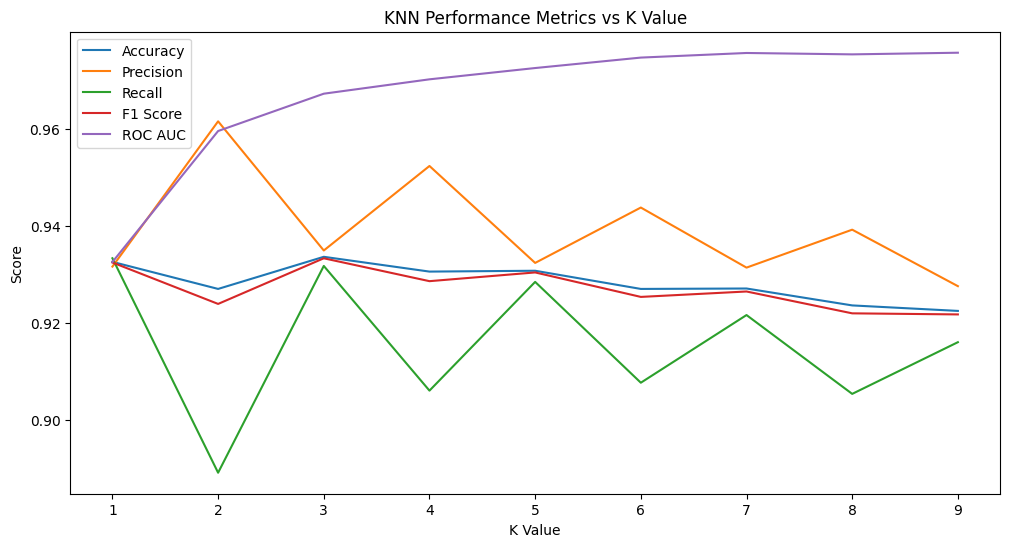

In [226]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Number of folds
k_folds = 5

# Range of K values for KNN
k_values = range(1, 10)

# Initialize a DataFrame to store results
KNN_Results = pd.DataFrame(columns=[
    'K Value', 'Fold', 'Accuracy', 'Precision', 'Recall', 
    'F1 Score', 'Specificity', 'ROC AUC', 'Balanced Accuracy'
])

# Convert x_train and y_train to NumPy arrays if they are DataFrames or Series
x_train_array = np.array(x_train) if isinstance(x_train, (pd.DataFrame, pd.Series)) else x_train
y_train_array = np.array(y_train) if isinstance(y_train, (pd.DataFrame, pd.Series)) else y_train

# K-Fold Cross-Validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

for k in k_values:
    fold = 1
    for train_index, test_index in kf.split(x_train_array):
        # Split the data
        X_train_fold, X_test_fold = x_train_array[train_index], x_train_array[test_index]
        y_train_fold, y_test_fold = y_train_array[train_index], y_train_array[test_index]
        
        # Initialize KNN model
        ModelKNN = KNeighborsClassifier(n_neighbors=k)
        
        # Train the model
        ModelKNN.fit(X_train_fold, y_train_fold)
        
        # Predict
        y_pred = ModelKNN.predict(X_test_fold)
        y_pred_prob = ModelKNN.predict_proba(X_test_fold)[:, 1]
        
        # Confusion matrix
        cm = confusion_matrix(y_test_fold, y_pred, labels=[1, 0])
        tp, fn, fp, tn = cm.ravel()
        
        # Metrics
        accuracy = accuracy_score(y_test_fold, y_pred)
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        balanced_accuracy = (recall + specificity) / 2
        roc_auc = roc_auc_score(y_test_fold, y_pred_prob)
        
        # Append results
        KNN_Results = KNN_Results._append({
            'K Value': k,
            'Fold': fold,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1_score,
            'Specificity': specificity,
            'ROC AUC': roc_auc,
            'Balanced Accuracy': balanced_accuracy
        }, ignore_index=True)
        
        fold += 1

# Display average results for each K value
average_results = KNN_Results.groupby('K Value').mean()
print(average_results)

# Plot performance metrics for each K value
plt.figure(figsize=(12, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']:
    plt.plot(average_results.index, average_results[metric], label=metric)
plt.xlabel('K Value')
plt.ylabel('Score')
plt.title('KNN Performance Metrics vs K Value')
plt.legend()
plt.show()
